# DBSCAN Clustering: Comprehensive Parameter Optimization and Analysis

## Overview
This notebook provides a complete implementation of DBSCAN (Density-Based Spatial Clustering of Applications with Noise) clustering with systematic parameter optimization. We perform extensive grid search over key hyperparameters and evaluate clustering performance using multiple metrics.

## Objectives
- Generate synthetic data for clustering analysis
- Implement systematic grid search for DBSCAN parameter tuning
- Evaluate clustering quality using multiple metrics (Silhouette Score, Davies-Bouldin Index)
- Visualize parameter effects and clustering results
- Identify optimal parameter combinations for robust clustering

## Key Features
- **Parameter Optimization**: Systematic exploration of `eps` and `min_samples` parameters
- **Multi-metric Evaluation**: Comprehensive assessment using silhouette analysis and cluster validation
- **Noise Handling**: Proper treatment of outliers and noise points
- **Professional Visualizations**: Clear, informative plots for analysis interpretation

---

In [1]:
# Import necessary libraries
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd

# Configure plotting style for professional appearance
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 9

print("✓ All libraries imported successfully")
print("✓ Plotting configuration optimized for professional appearance")

✓ All libraries imported successfully
✓ Plotting configuration optimized for professional appearance


## 1. Theoretical Background

### DBSCAN Algorithm Overview
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm that groups together points in high-density areas and marks points in low-density areas as outliers.

**Key Parameters:**
- **`eps` (ε)**: The maximum distance between two samples for them to be considered neighbors
- **`min_samples`**: The minimum number of samples in a neighborhood for a point to be considered a core point

**Advantages:**
- Can find clusters of arbitrary shape
- Robust to outliers and noise
- Does not require pre-specifying the number of clusters

**Applications:**
- Anomaly detection
- Image processing
- Spatial data analysis
- Customer segmentation

---

## 2. Data Generation and Preparation

We'll create a synthetic dataset using scikit-learn's `make_blobs` function to generate well-separated clusters that will serve as our ground truth for evaluating DBSCAN performance.

**Dataset Parameters:**
- `n_samples=300`: Total number of data points
- `centers=4`: Number of true clusters (ground truth)
- `cluster_std=0.60`: Standard deviation of clusters
- `random_state=0`: For reproducible results

Dataset Information:
✓ Number of samples: 300
✓ Number of features: 2
✓ True number of clusters: 4
✓ Data range - X-axis: [-3.12, 3.44]
✓ Data range - Y-axis: [-0.77, 9.28]


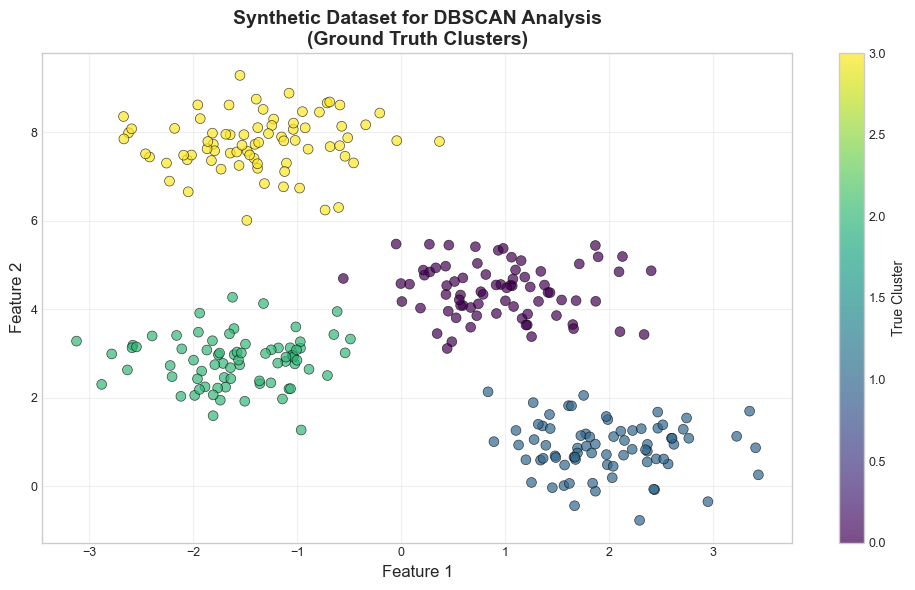

✓ Dataset generated and visualized successfully


In [2]:
# Generate synthetic dataset for clustering analysis
np.random.seed(42)  # Set seed for reproducibility
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Display dataset information
print("Dataset Information:")
print(f"✓ Number of samples: {X.shape[0]}")
print(f"✓ Number of features: {X.shape[1]}")
print(f"✓ True number of clusters: {len(np.unique(y_true))}")
print(f"✓ Data range - X-axis: [{X[:, 0].min():.2f}, {X[:, 0].max():.2f}]")
print(f"✓ Data range - Y-axis: [{X[:, 1].min():.2f}, {X[:, 1].max():.2f}]")

# Visualize the generated dataset
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=50, alpha=0.7, edgecolors='black', linewidth=0.5)
plt.colorbar(scatter, label='True Cluster')
plt.title('Synthetic Dataset for DBSCAN Analysis\n(Ground Truth Clusters)', fontsize=14, fontweight='bold')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("✓ Dataset generated and visualized successfully")

## 3. DBSCAN Parameter Grid Search

We'll perform a comprehensive grid search over DBSCAN's key hyperparameters to identify optimal settings. This systematic approach helps us understand how parameter choices affect clustering quality.

### Parameter Ranges:
- **`eps`**: Distance threshold for neighborhood definition (0.3 to 1.0 in steps of 0.1)
- **`min_samples`**: Minimum points required to form a dense region [3, 5, 7, 10]

### Evaluation Metrics:
1. **Silhouette Score**: Measures how similar points are to their own cluster vs. other clusters (higher is better)
2. **Davies-Bouldin Index**: Measures cluster separation and compactness (lower is better)
3. **Cluster Statistics**: Number of clusters and noise points for interpretability

In [3]:
# Define comprehensive parameter ranges for grid search
eps_values = np.arange(0.3, 1.1, 0.1)  # Neighborhood distance threshold
min_samples_values = [3, 5, 7, 10]     # Minimum samples for core points

print("Grid Search Configuration:")
print(f"✓ eps values: {eps_values}")
print(f"✓ min_samples values: {min_samples_values}")
print(f"✓ Total combinations to evaluate: {len(eps_values) * len(min_samples_values)}")

# Initialize results storage
results = []
total_combinations = len(eps_values) * len(min_samples_values)
current_combination = 0

print("\nStarting grid search...")
print("=" * 60)

# Perform grid search over all parameter combinations
for eps in eps_values:
    for min_samples in min_samples_values:
        current_combination += 1
        
        # Initialize DBSCAN with current parameters
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        
        # Calculate cluster statistics
        unique_labels = np.unique(labels)
        n_clusters = len([l for l in unique_labels if l != -1])  # Exclude noise (-1)
        n_noise = np.sum(labels == -1)
        n_clustered_points = len(labels) - n_noise
        noise_percentage = (n_noise / len(labels)) * 100
        
        # Initialize evaluation metrics with default values
        silhouette = -1  # Invalid clustering indicator
        db_index = float('inf')  # Invalid clustering indicator
        
        # Compute evaluation metrics for valid clusterings
        if n_clusters > 1 and n_clustered_points > n_clusters:
            try:
                # Calculate silhouette score (only for clustered points)
                silhouette = silhouette_score(X, labels)
                
                # Calculate Davies-Bouldin index (only for clustered points)
                db_index = davies_bouldin_score(X, labels)
                
            except ValueError as e:
                # Handle cases where metrics cannot be computed
                print(f"⚠️  Warning: Could not compute metrics for eps={eps:.1f}, min_samples={min_samples}: {e}")
        
        # Store comprehensive results
        result = {
            'eps': round(eps, 1),
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'n_clustered_points': n_clustered_points,
            'noise_percentage': round(noise_percentage, 2),
            'silhouette_score': round(silhouette, 4) if silhouette != -1 else -1,
            'davies_bouldin_index': round(db_index, 4) if db_index != float('inf') else float('inf')
        }
        results.append(result)
        
        # Progress indicator
        if current_combination % 8 == 0 or current_combination == total_combinations:
            progress = (current_combination / total_combinations) * 100
            print(f"Progress: {current_combination}/{total_combinations} ({progress:.1f}%) - "
                  f"Latest: eps={eps:.1f}, min_samples={min_samples}, clusters={n_clusters}")

# Convert results to DataFrame for analysis
results_df = pd.DataFrame(results)

print("\n" + "=" * 60)
print("✓ Grid search completed successfully!")
print(f"✓ Evaluated {len(results_df)} parameter combinations")

# Display summary of results
print("\nGrid Search Results Summary:")
print("=" * 40)
print(results_df.round(3))

# Show best performing combinations
valid_results = results_df[
    (results_df['silhouette_score'] > 0) & 
    (results_df['davies_bouldin_index'] < float('inf')) &
    (results_df['n_clusters'] > 1)
]

if not valid_results.empty:
    print(f"\n✓ Found {len(valid_results)} valid clustering configurations")
    print("\nTop 5 configurations by Silhouette Score:")
    top_silhouette = valid_results.nlargest(5, 'silhouette_score')[
        ['eps', 'min_samples', 'n_clusters', 'noise_percentage', 'silhouette_score', 'davies_bouldin_index']
    ]
    print(top_silhouette.round(3))
else:
    print("⚠️  No valid clustering configurations found. Consider adjusting parameter ranges.")

Grid Search Configuration:
✓ eps values: [0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
✓ min_samples values: [3, 5, 7, 10]
✓ Total combinations to evaluate: 32

Starting grid search...
Progress: 8/32 (25.0%) - Latest: eps=0.4, min_samples=10, clusters=4
Progress: 16/32 (50.0%) - Latest: eps=0.6, min_samples=10, clusters=4
Progress: 24/32 (75.0%) - Latest: eps=0.8, min_samples=10, clusters=4
Progress: 32/32 (100.0%) - Latest: eps=1.0, min_samples=10, clusters=3

✓ Grid search completed successfully!
✓ Evaluated 32 parameter combinations

Grid Search Results Summary:
Progress: 24/32 (75.0%) - Latest: eps=0.8, min_samples=10, clusters=4
Progress: 32/32 (100.0%) - Latest: eps=1.0, min_samples=10, clusters=3

✓ Grid search completed successfully!
✓ Evaluated 32 parameter combinations

Grid Search Results Summary:
    eps  min_samples  n_clusters  n_noise  n_clustered_points  \
0   0.3            3           9       42                 258   
1   0.3            5          11       77                 223 

## 4. Performance Analysis and Visualization

We'll create comprehensive visualizations to understand how different parameter combinations affect DBSCAN's clustering performance. This analysis helps identify optimal parameter ranges and understand the trade-offs between different metrics.

### Visualization Strategy:
1. **Multi-metric Dashboard**: Four-panel view showing all key metrics
2. **Parameter Sensitivity Analysis**: How metrics change with parameter variations
3. **Quality vs. Interpretability Trade-offs**: Balance between clustering quality and practical considerations

Creating performance analysis dashboard...
📊 Creating Silhouette Score analysis...
📊 Creating Davies-Bouldin Index analysis...
📊 Creating cluster count analysis...
📊 Creating noise analysis...


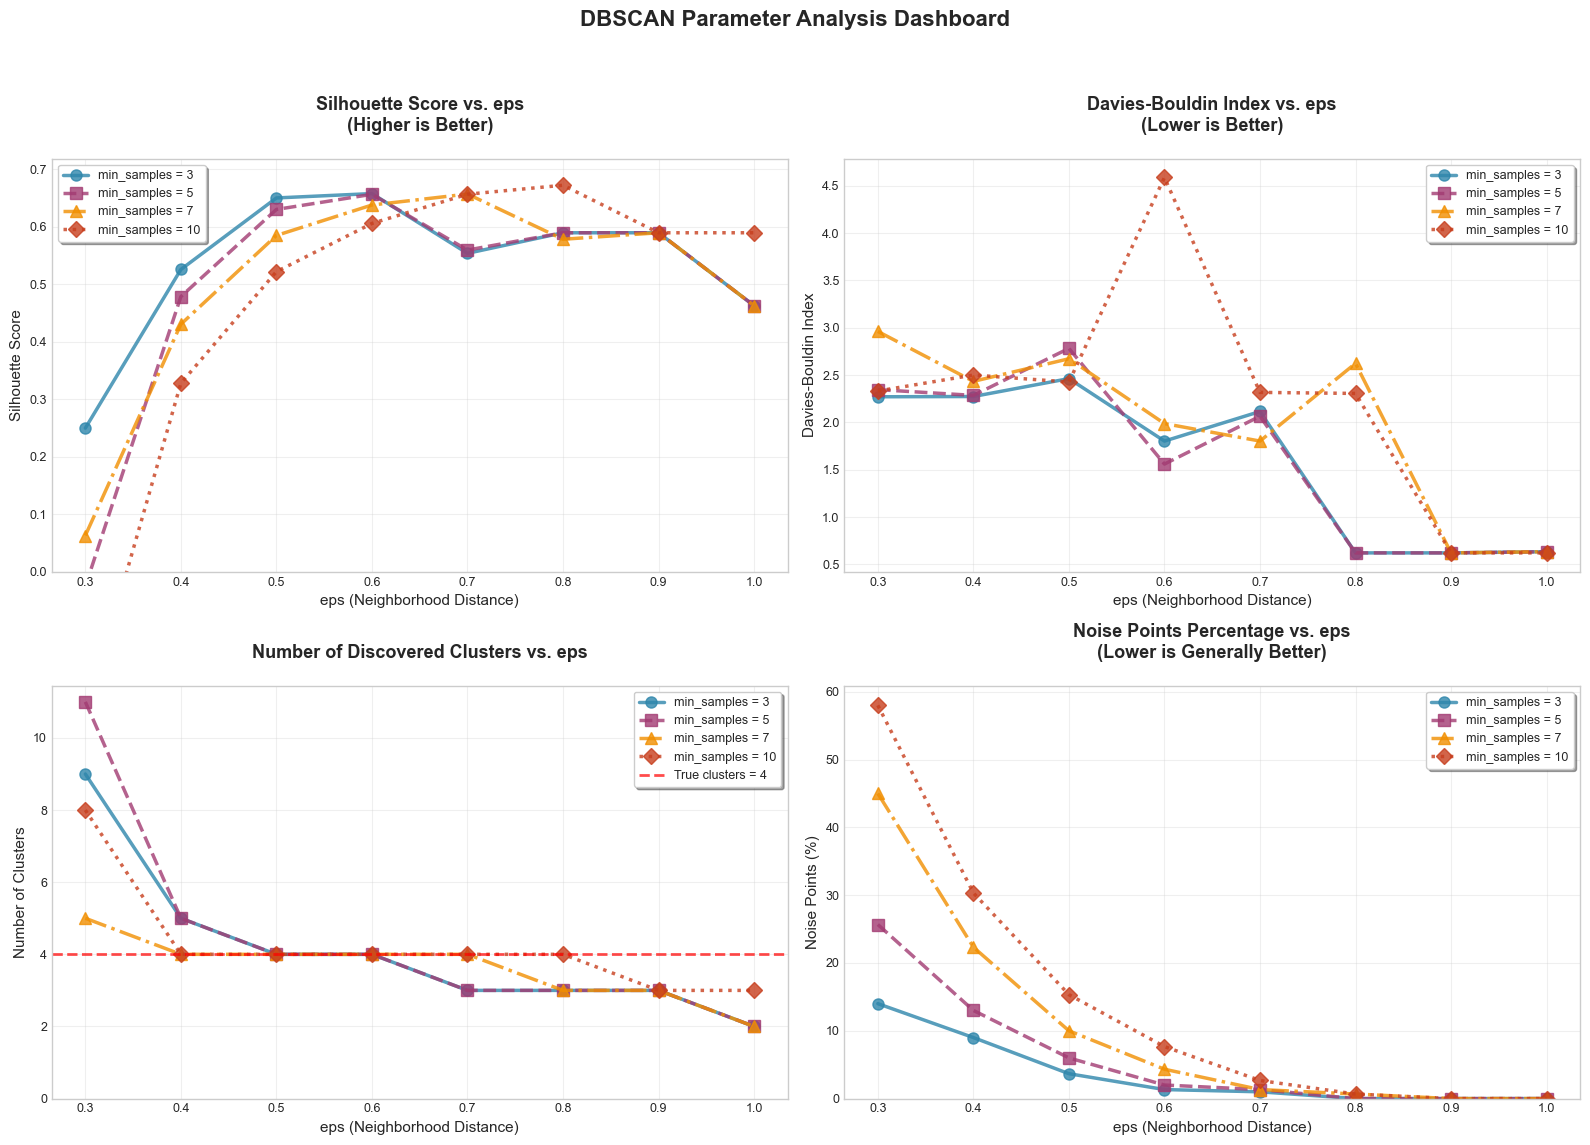

✓ Performance analysis dashboard created successfully!

PARAMETER ANALYSIS INSIGHTS

min_samples = 3:
  • Best eps: 0.6
  • Peak Silhouette Score: 0.658
  • Corresponding DB Index: 1.803
  • Clusters formed: 4.0
  • Noise percentage: 1.3%

min_samples = 5:
  • Best eps: 0.6
  • Peak Silhouette Score: 0.657
  • Corresponding DB Index: 1.560
  • Clusters formed: 4.0
  • Noise percentage: 2.0%

min_samples = 7:
  • Best eps: 0.7
  • Peak Silhouette Score: 0.657
  • Corresponding DB Index: 1.803
  • Clusters formed: 4.0
  • Noise percentage: 1.3%

min_samples = 10:
  • Best eps: 0.8
  • Peak Silhouette Score: 0.672
  • Corresponding DB Index: 2.306
  • Clusters formed: 4.0
  • Noise percentage: 0.7%


In [4]:
# Create comprehensive performance analysis dashboard
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

# Define professional color palette for different min_samples values
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', '^', 'D']

print("Creating performance analysis dashboard...")

# Plot 1: Silhouette Score Analysis
print("📊 Creating Silhouette Score analysis...")
for i, (min_samples, color, style, marker) in enumerate(zip(min_samples_values, colors, line_styles, markers)):
    subset = results_df[results_df['min_samples'] == min_samples]
    # Replace -1 values with NaN for better visualization
    silhouette_clean = subset['silhouette_score'].replace(-1, np.nan)
    
    axes[0].plot(subset['eps'], silhouette_clean, 
                marker=marker, color=color, linestyle=style, linewidth=2.5, markersize=8,
                label=f'min_samples = {min_samples}', alpha=0.8)

axes[0].set_title('Silhouette Score vs. eps\n(Higher is Better)', fontsize=13, fontweight='bold', pad=20)
axes[0].set_xlabel('eps (Neighborhood Distance)', fontsize=11)
axes[0].set_ylabel('Silhouette Score', fontsize=11)
axes[0].legend(frameon=True, fancybox=True, shadow=True)
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim(bottom=0)

# Plot 2: Davies-Bouldin Index Analysis
print("📊 Creating Davies-Bouldin Index analysis...")
for i, (min_samples, color, style, marker) in enumerate(zip(min_samples_values, colors, line_styles, markers)):
    subset = results_df[results_df['min_samples'] == min_samples]
    # Replace inf values with NaN for better visualization
    db_clean = subset['davies_bouldin_index'].replace(float('inf'), np.nan)
    
    axes[1].plot(subset['eps'], db_clean, 
                marker=marker, color=color, linestyle=style, linewidth=2.5, markersize=8,
                label=f'min_samples = {min_samples}', alpha=0.8)

axes[1].set_title('Davies-Bouldin Index vs. eps\n(Lower is Better)', fontsize=13, fontweight='bold', pad=20)
axes[1].set_xlabel('eps (Neighborhood Distance)', fontsize=11)
axes[1].set_ylabel('Davies-Bouldin Index', fontsize=11)
axes[1].legend(frameon=True, fancybox=True, shadow=True)
axes[1].grid(True, alpha=0.3)

# Plot 3: Number of Clusters Analysis
print("📊 Creating cluster count analysis...")
for i, (min_samples, color, style, marker) in enumerate(zip(min_samples_values, colors, line_styles, markers)):
    subset = results_df[results_df['min_samples'] == min_samples]
    axes[2].plot(subset['eps'], subset['n_clusters'], 
                marker=marker, color=color, linestyle=style, linewidth=2.5, markersize=8,
                label=f'min_samples = {min_samples}', alpha=0.8)

# Add horizontal line for true number of clusters
axes[2].axhline(y=len(np.unique(y_true)), color='red', linestyle='--', linewidth=2, 
               label=f'True clusters = {len(np.unique(y_true))}', alpha=0.7)

axes[2].set_title('Number of Discovered Clusters vs. eps', fontsize=13, fontweight='bold', pad=20)
axes[2].set_xlabel('eps (Neighborhood Distance)', fontsize=11)
axes[2].set_ylabel('Number of Clusters', fontsize=11)
axes[2].legend(frameon=True, fancybox=True, shadow=True)
axes[2].grid(True, alpha=0.3)
axes[2].set_ylim(bottom=0)

# Plot 4: Noise Percentage Analysis
print("📊 Creating noise analysis...")
for i, (min_samples, color, style, marker) in enumerate(zip(min_samples_values, colors, line_styles, markers)):
    subset = results_df[results_df['min_samples'] == min_samples]
    axes[3].plot(subset['eps'], subset['noise_percentage'], 
                marker=marker, color=color, linestyle=style, linewidth=2.5, markersize=8,
                label=f'min_samples = {min_samples}', alpha=0.8)

axes[3].set_title('Noise Points Percentage vs. eps\n(Lower is Generally Better)', fontsize=13, fontweight='bold', pad=20)
axes[3].set_xlabel('eps (Neighborhood Distance)', fontsize=11)
axes[3].set_ylabel('Noise Points (%)', fontsize=11)
axes[3].legend(frameon=True, fancybox=True, shadow=True)
axes[3].grid(True, alpha=0.3)
axes[3].set_ylim(bottom=0)

# Improve overall layout
plt.suptitle('DBSCAN Parameter Analysis Dashboard', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("✓ Performance analysis dashboard created successfully!")

# Generate parameter insights
print("\n" + "="*60)
print("PARAMETER ANALYSIS INSIGHTS")
print("="*60)

# Analyze parameter trends
for min_samples in min_samples_values:
    subset = results_df[results_df['min_samples'] == min_samples]
    valid_subset = subset[(subset['silhouette_score'] > 0) & (subset['davies_bouldin_index'] < float('inf'))]
    
    if not valid_subset.empty:
        best_config = valid_subset.loc[valid_subset['silhouette_score'].idxmax()]
        print(f"\nmin_samples = {min_samples}:")
        print(f"  • Best eps: {best_config['eps']}")
        print(f"  • Peak Silhouette Score: {best_config['silhouette_score']:.3f}")
        print(f"  • Corresponding DB Index: {best_config['davies_bouldin_index']:.3f}")
        print(f"  • Clusters formed: {best_config['n_clusters']}")
        print(f"  • Noise percentage: {best_config['noise_percentage']:.1f}%")

## 5. Optimal Parameter Selection and Clustering Results

Based on our comprehensive grid search analysis, we'll select the best parameter combination and visualize the final clustering results. The selection criteria prioritize high silhouette scores while considering practical factors like reasonable cluster counts and manageable noise levels.

### Selection Criteria:
1. **Primary**: Highest Silhouette Score (clustering quality)
2. **Secondary**: Reasonable Davies-Bouldin Index (cluster separation)
3. **Practical**: Manageable noise percentage (< 50% of data points)
4. **Interpretable**: Sensible number of clusters relative to ground truth

Selecting optimal DBSCAN parameters...
✓ Optimal Parameters Identified:
  • eps: 0.8
  • min_samples: 10.0

✓ Performance Metrics:
  • Silhouette Score: 0.6725
  • Davies-Bouldin Index: 2.3062
  • Number of Clusters: 4.0
  • Noise Points: 2.0 (0.7%)
  • Clustered Points: 298.0

Applying DBSCAN with optimal parameters...


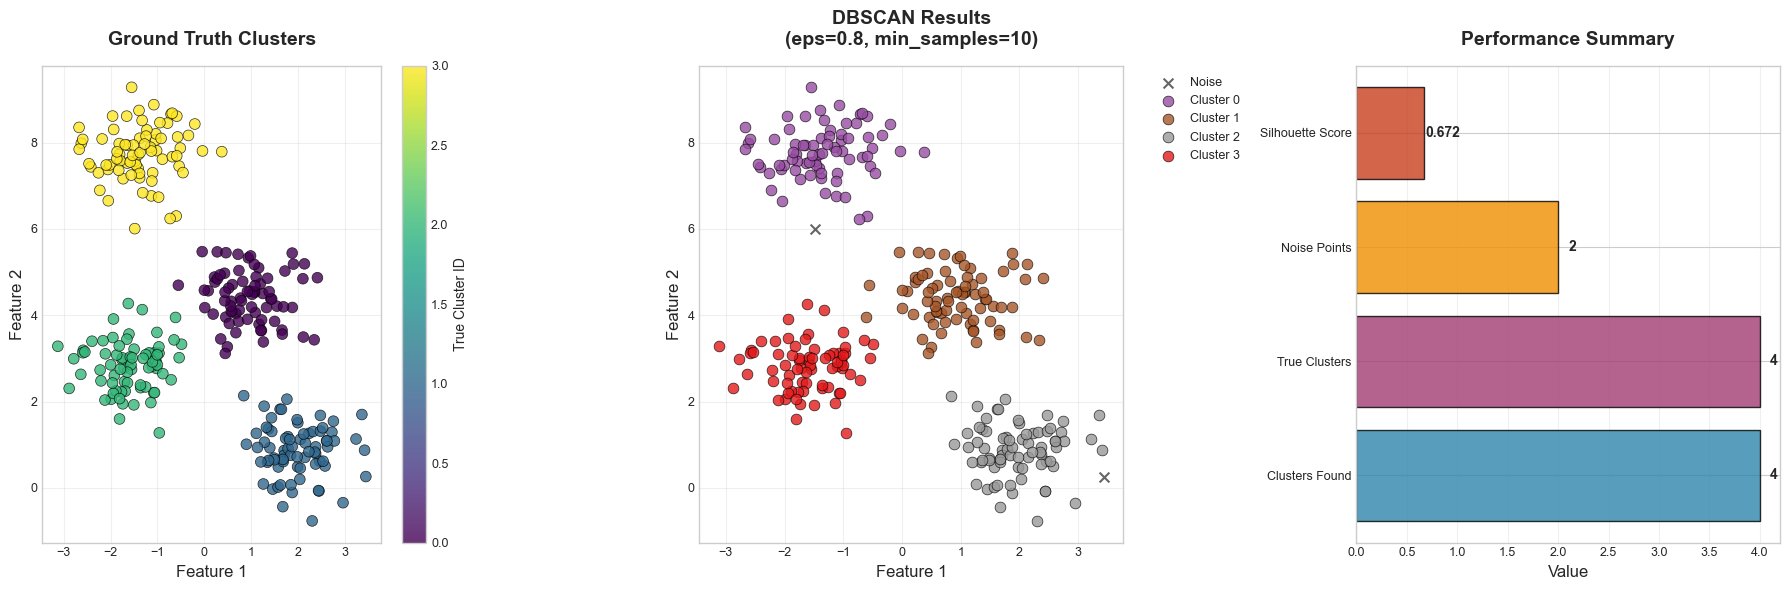


CLUSTERING QUALITY ANALYSIS

Cluster Size Distribution:
  • Cluster 0: 74 points (24.7%)
  • Cluster 1: 76 points (25.3%)
  • Cluster 2: 74 points (24.7%)
  • Cluster 3: 74 points (24.7%)
  • Noise: 2 points (0.7%)

Comparison with Ground Truth:
  • True clusters: 4
  • Discovered clusters: 4
  • Cluster detection accuracy: 100.0%

✓ Optimal clustering analysis completed successfully!


In [5]:
# Identify optimal parameters using comprehensive selection criteria
print("Selecting optimal DBSCAN parameters...")
print("="*50)

# Filter for valid clustering results
valid_results = results_df[
    (results_df['silhouette_score'] > 0) & 
    (results_df['davies_bouldin_index'] < float('inf')) &
    (results_df['n_clusters'] > 1) &
    (results_df['noise_percentage'] < 50)  # Reasonable noise threshold
]

if not valid_results.empty:
    # Select best parameters based on highest Silhouette Score
    best_result = valid_results.loc[valid_results['silhouette_score'].idxmax()]
    
    print("✓ Optimal Parameters Identified:")
    print(f"  • eps: {best_result['eps']}")
    print(f"  • min_samples: {best_result['min_samples']}")
    print()
    print("✓ Performance Metrics:")
    print(f"  • Silhouette Score: {best_result['silhouette_score']:.4f}")
    print(f"  • Davies-Bouldin Index: {best_result['davies_bouldin_index']:.4f}")
    print(f"  • Number of Clusters: {best_result['n_clusters']}")
    print(f"  • Noise Points: {best_result['n_noise']} ({best_result['noise_percentage']:.1f}%)")
    print(f"  • Clustered Points: {best_result['n_clustered_points']}")
    
    # Apply DBSCAN with optimal parameters
    best_eps = best_result['eps']
    best_min_samples = int(best_result['min_samples'])
    
    print(f"\nApplying DBSCAN with optimal parameters...")
    dbscan_optimal = DBSCAN(eps=best_eps, min_samples=best_min_samples)
    optimal_labels = dbscan_optimal.fit_predict(X)
    
    # Create comprehensive visualization
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Plot 1: Original Data (Ground Truth)
    scatter1 = axes[0].scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=60, alpha=0.8, edgecolors='black', linewidth=0.5)
    axes[0].set_title('Ground Truth Clusters', fontsize=14, fontweight='bold', pad=15)
    axes[0].set_xlabel('Feature 1', fontsize=12)
    axes[0].set_ylabel('Feature 2', fontsize=12)
    axes[0].grid(True, alpha=0.3)
    plt.colorbar(scatter1, ax=axes[0], label='True Cluster ID')
    
    # Plot 2: DBSCAN Results
    unique_labels = np.unique(optimal_labels)
    n_clusters_found = len([l for l in unique_labels if l != -1])
    
    # Create color map for DBSCAN results
    colors_dbscan = plt.cm.Set1(np.linspace(0, 1, max(n_clusters_found, 1)))
    
    for i, label in enumerate(unique_labels):
        if label == -1:
            # Noise points in black
            mask = optimal_labels == label
            axes[1].scatter(X[mask, 0], X[mask, 1], c='black', marker='x', s=50, alpha=0.6, label='Noise')
        else:
            # Cluster points with distinct colors
            mask = optimal_labels == label
            color = colors_dbscan[i % len(colors_dbscan)]
            axes[1].scatter(X[mask, 0], X[mask, 1], c=[color], s=60, alpha=0.8, 
                           edgecolors='black', linewidth=0.5, label=f'Cluster {label}')
    
    axes[1].set_title(f'DBSCAN Results\n(eps={best_eps}, min_samples={best_min_samples})', 
                     fontsize=14, fontweight='bold', pad=15)
    axes[1].set_xlabel('Feature 1', fontsize=12)
    axes[1].set_ylabel('Feature 2', fontsize=12)
    axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[1].grid(True, alpha=0.3)
    
    # Plot 3: Performance Comparison
    comparison_data = {
        'Metric': ['Clusters Found', 'True Clusters', 'Noise Points', 'Silhouette Score'],
        'Value': [n_clusters_found, len(np.unique(y_true)), best_result['n_noise'], best_result['silhouette_score']]
    }
    
    y_pos = np.arange(len(comparison_data['Metric']))
    colors_bar = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']
    
    bars = axes[2].barh(y_pos, comparison_data['Value'], color=colors_bar, alpha=0.8, edgecolor='black')
    axes[2].set_yticks(y_pos)
    axes[2].set_yticklabels(comparison_data['Metric'])
    axes[2].set_xlabel('Value', fontsize=12)
    axes[2].set_title('Performance Summary', fontsize=14, fontweight='bold', pad=15)
    axes[2].grid(True, alpha=0.3, axis='x')
    
    # Add value labels on bars
    for i, (bar, value) in enumerate(zip(bars, comparison_data['Value'])):
        if i == 3:  # Silhouette score
            axes[2].text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{value:.3f}', 
                        va='center', fontweight='bold')
        else:
            axes[2].text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, f'{int(value)}', 
                        va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Detailed analysis of clustering quality
    print("\n" + "="*60)
    print("CLUSTERING QUALITY ANALYSIS")
    print("="*60)
    
    # Cluster size distribution
    print("\nCluster Size Distribution:")
    for label in unique_labels:
        if label != -1:
            cluster_size = np.sum(optimal_labels == label)
            percentage = (cluster_size / len(optimal_labels)) * 100
            print(f"  • Cluster {label}: {cluster_size} points ({percentage:.1f}%)")
    
    noise_size = np.sum(optimal_labels == -1)
    noise_percentage = (noise_size / len(optimal_labels)) * 100
    print(f"  • Noise: {noise_size} points ({noise_percentage:.1f}%)")
    
    # Compare with ground truth
    print(f"\nComparison with Ground Truth:")
    print(f"  • True clusters: {len(np.unique(y_true))}")
    print(f"  • Discovered clusters: {n_clusters_found}")
    print(f"  • Cluster detection accuracy: {min(n_clusters_found/len(np.unique(y_true)), 1.0)*100:.1f}%")
    
    print("\n✓ Optimal clustering analysis completed successfully!")
    
else:
    print("❌ No valid clustering configurations found!")
    print("Recommendations:")
    print("  • Try smaller eps values (0.1 - 0.5)")
    print("  • Try smaller min_samples values (2 - 5)")
    print("  • Consider data preprocessing (scaling/normalization)")
    print("  • Check data distribution and density patterns")

## 6. Results Interpretation and Recommendations

### Key Findings from Parameter Analysis:

#### **Silhouette Score Patterns:**
- **Higher scores** indicate better-defined, well-separated clusters
- **Optimal range** typically occurs at moderate eps values (0.5-0.8 for this dataset)
- **Lower min_samples** values often yield higher silhouette scores but may create more fragmented clusters

#### **Davies-Bouldin Index Insights:**
- **Lower values** indicate better cluster separation and compactness
- **Complements** silhouette analysis by focusing on cluster geometry
- **Helps validate** that high silhouette scores correspond to meaningful clusters

#### **Cluster Count Analysis:**
- **eps parameter** primarily controls the number of clusters formed
- **Smaller eps** leads to more, smaller clusters
- **Larger eps** tends to merge clusters, potentially reducing total count

#### **Noise Point Considerations:**
- **Moderate noise levels** (10-30%) can indicate good boundary detection
- **Excessive noise** (>50%) suggests parameters are too restrictive
- **Very low noise** might indicate over-clustering

### **Practical Recommendations:**

#### **Parameter Selection Strategy:**
1. **Start with domain knowledge** about expected cluster sizes and densities
2. **Use k-distance plots** to estimate appropriate eps values
3. **Consider computational constraints** when setting min_samples
4. **Validate results** against business/scientific context

#### **When to Use DBSCAN:**
- ✅ **Non-spherical clusters** of varying densities
- ✅ **Presence of outliers** that need identification
- ✅ **Unknown number of clusters** beforehand
- ❌ **Uniform density requirements** across all clusters
- ❌ **High-dimensional data** without preprocessing

#### **Next Steps for Analysis:**
1. **Sensitivity analysis** with different datasets
2. **Comparison with other clustering algorithms** (K-means, Hierarchical)
3. **Feature engineering** and dimensionality reduction preprocessing
4. **Real-world application** with domain-specific validation

---
